In [1]:
# Train data with Naive Bayes Classifier

In [24]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jacobberger/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/jacobberger/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import nltk

/Users/jacobberger/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
data = pd.read_csv('../util/reviews_token.csv')

In [28]:
df_fiq = pd.read_csv('../util/fiq_clean_text.csv')

In [70]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.dropna(inplace=True)

[Text(0, 0, 'experience with doctor'),
 Text(0, 0, 'advice give prospective patient'),
 Text(0, 0, 'experience with nurse'),
 Text(0, 0, 'experience with clinic'),
 Text(0, 0, 'protocols and success'),
 Text(0, 0, 'cost'),
 Text(0, 0, 'specific things went wrong')]

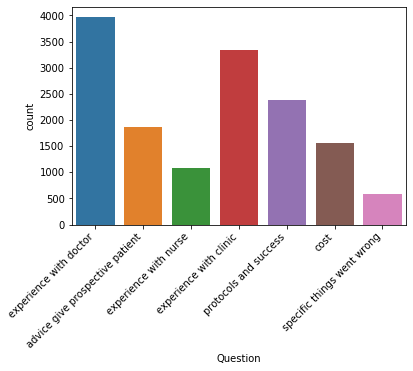

In [71]:
chart = sns.countplot(data.Question)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


# Cleaning pipeline

In [75]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [77]:
msg_train, msg_test, label_train, label_test = train_test_split(data.clean_answers, data.Question, test_size=0.4)

In [78]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [79]:
predictions = pipeline.predict(msg_test)

In [80]:
print(confusion_matrix(label_test,predictions))
print('\n')
print(classification_report(label_test,predictions))

[[ 177    5   64  480    2    9    0]
 [   1  536   31   40    0   19    0]
 [   2    2 1069  237    0    7    0]
 [   0    0   70 1492    1   33    0]
 [   0    0  174  247   13    1    0]
 [   1    9    5  129    0  818    0]
 [   0    0    3    0    0    0  241]]


                                 precision    recall  f1-score   support

advice give prospective patient       0.98      0.24      0.39       737
                           cost       0.97      0.85      0.91       627
         experience with clinic       0.75      0.81      0.78      1317
         experience with doctor       0.57      0.93      0.71      1596
          experience with nurse       0.81      0.03      0.06       435
          protocols and success       0.92      0.85      0.88       962
     specific things went wrong       1.00      0.99      0.99       244

                       accuracy                           0.73      5918
                      macro avg       0.86      0.67      0.67      5918

# SVC Model

In [81]:
from sklearn import svm

In [101]:
SVM = svm.SVC(C=2) # default kernel = ’rbf’

In [102]:
pipeline1 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVM),  # train on TF-IDF vectors w/ SVM
])

In [103]:
pipeline1.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC(C=2))])

In [104]:
predictions1 = pipeline1.predict(msg_test)

In [105]:
print(confusion_matrix(label_test,predictions1))
print('\n')
print(classification_report(label_test,predictions1))

[[ 537    8   55  108   11   18    0]
 [  10  578   17    6    0   16    0]
 [  32    3 1106  112   55    9    0]
 [  73    1   87 1371   18   46    0]
 [  15    1  139   77  199    4    0]
 [  26   12   13   44    0  867    0]
 [   0    0    0    0    0    0  244]]


                                 precision    recall  f1-score   support

advice give prospective patient       0.77      0.73      0.75       737
                           cost       0.96      0.92      0.94       627
         experience with clinic       0.78      0.84      0.81      1317
         experience with doctor       0.80      0.86      0.83      1596
          experience with nurse       0.70      0.46      0.55       435
          protocols and success       0.90      0.90      0.90       962
     specific things went wrong       1.00      1.00      1.00       244

                       accuracy                           0.83      5918
                      macro avg       0.85      0.82      0.83      5918

In [86]:
print(confusion_matrix(label_test,predictions1))
print('\n')
print(classification_report(label_test,predictions1))

[[ 507    8   58  137   11   16    0]
 [  10  573   19    8    0   17    0]
 [  26    3 1123  111   45    9    0]
 [  49    0   88 1393   17   49    0]
 [  10    1  151   80  189    4    0]
 [  22   12   13   49    0  866    0]
 [   0    0    0    0    0    0  244]]


                                 precision    recall  f1-score   support

advice give prospective patient       0.81      0.69      0.75       737
                           cost       0.96      0.91      0.94       627
         experience with clinic       0.77      0.85      0.81      1317
         experience with doctor       0.78      0.87      0.83      1596
          experience with nurse       0.72      0.43      0.54       435
          protocols and success       0.90      0.90      0.90       962
     specific things went wrong       1.00      1.00      1.00       244

                       accuracy                           0.83      5918
                      macro avg       0.85      0.81      0.82      5918

# Use SVC Model on Yelp Data

In [122]:
yelp = pd.read_csv('../util/yelp_clean.csv')

In [123]:
yelp = yelp.dropna()
yelp.reset_index(drop=True,inplace=True)

In [ ]:
# Split some yelp reviews for manual 

In [124]:
yelp_predictions = pipeline1.predict(yelp.clean_answers)

In [130]:
yelp[['Reviews_by_sentence','topics_predicted']].head()

,Reviews_by_sentence,topics_predicted
0,Columbia University Fertility center is an exc...,experience with clinic
1,We were seen by Dr Paula Brady at the Columbi...,experience with doctor
2,"She is an excellent doctor, who treats her pa...",experience with doctor
3,Dr Brady took care of us and everything worke...,experience with doctor
4,The Clinic as a whole is also very good as it ...,experience with clinic


In [125]:
yelp['topics_predicted'] = yelp_predictions

[Text(0, 0, 'experience with doctor'),
 Text(0, 0, 'advice give prospective patient'),
 Text(0, 0, 'experience with nurse'),
 Text(0, 0, 'experience with clinic'),
 Text(0, 0, 'protocols and success'),
 Text(0, 0, 'cost')]

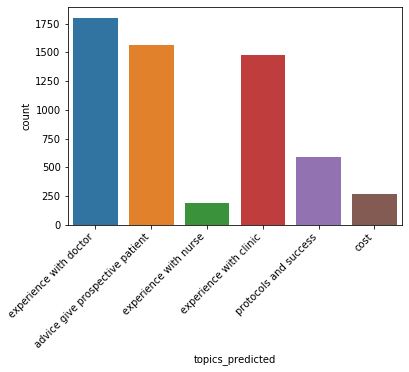

In [126]:
g = sns.countplot(yelp.topics_predicted)
g.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [132]:
yelp

,Unnamed: 0,Reviews_by_sentence,Clinic,clean_answers,topics_predicted
0,0,Columbia University Fertility center is an exc...,Columbia University Fertility,columbia university fertility center excellent...,experience with clinic
1,1,We were seen by Dr Paula Brady at the Columbi...,Columbia University Fertility,see dr paula brady columbia university clinic,experience with doctor
2,2,"She is an excellent doctor, who treats her pa...",Columbia University Fertility,excellent doctor treat patient personal level,experience with doctor
3,3,Dr Brady took care of us and everything worke...,Columbia University Fertility,dr brady take care work great,experience with doctor
4,4,The Clinic as a whole is also very good as it ...,Columbia University Fertility,clinic good open patient holiday weekend new y...,experience with clinic
...,...,...,...,...,...
5881,5897,I'm in the middle of my treatments with them ...,Penn Fertility Care,middle treatment pregnant consider go else sen...,experience with doctor
5882,5898,They have also been individualized in their b...,Penn Fertility Care,individualize bill approaches explain bill ask...,experience with clinic
5883,5899,The doctors are all excellent-- we've gotten ...,Penn Fertility Care,doctor excellent get treatment inclement weath...,experience with doctor
5884,5900,The nursing staff is the same way,Penn Fertility Care,nurse staff way,experience with clinic


In [127]:
yelp.to_csv("yelp_model_results.csv")

# Model with word embedding

In [60]:
import gensim
from gensim.models import Word2Vec
# let X be a list of tokenized texts (i.e. list of lists of tokens)
#model = gensim.models.Word2Vec(X, size=100)
#w2v = dict(zip(model.wv.index2word, model.wv.syn0))

In [61]:
wv

In [57]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


# Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
rf = RandomForestClassifier()

In [6]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', rf),  # train on TF-IDF vectors w/ SVM
])

In [7]:
pipeline.fit(msg_train,label_train)

NameError: name 'msg_train' is not defined

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
print(confusion_matrix(label_test,predictions))
print('\n')
print(classification_report(label_test,predictions))

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jacobberger/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# WORD2VEC WITH GENSIM

In [41]:
import gensim
import gensim.downloader as api
#wv = api.load('word2vec-google-news-300')
from gensim.models import Word2Vec
wv = gensim.models.KeyedVectors.load_word2vec_format("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", binary=True)

wv.init_sims(replace=True)

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jacobberger/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [23]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [29]:
train, test = train_test_split(df_fiq, test_size=0.3, random_state = 42)

In [51]:
#df_fiq

In [47]:
test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['Answer']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['Answer']), axis=1).values

In [49]:
import logging
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  


In [83]:
# svc classifier
from sklearn.metrics import accuracy_score
from sklearn import svm
SVM = svm.SVC(C=10) # default kernel = ’rbf’
svm = SVM.fit(X_train_word_average, train['Question'])
y_pred = svm.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.Question))
print(classification_report(test.Question, y_pred))

accuracy 0.8655877725331536
              precision    recall  f1-score   support

      Advice       0.86      0.85      0.86       590
      Clinic       0.80      0.88      0.84       998
        Cost       0.93      0.95      0.94       461
      Doctor       0.87      0.88      0.88      1180
       Nurse       0.73      0.55      0.63       343
    Problems       1.00      1.00      1.00       159
   Protocols       0.93      0.90      0.92       718

    accuracy                           0.87      4449
   macro avg       0.88      0.86      0.86      4449
weighted avg       0.86      0.87      0.86      4449



In [88]:
from sklearn import svm
SVM = svm.SVC(C=10) # default kernel = ’rbf’
wv_pipeline = Pipeline([
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVM)  # train on TF-IDF vectors w/ SVM
])

In [89]:
wv_pipeline.fit(X_train_word_average, train['Question'])

Pipeline(steps=[('classifier', SVC(C=10))])

In [90]:
y_pred = wv_pipeline.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.Question))
print(classification_report(test.Question, y_pred))

accuracy 0.8655877725331536
              precision    recall  f1-score   support

      Advice       0.86      0.85      0.86       590
      Clinic       0.80      0.88      0.84       998
        Cost       0.93      0.95      0.94       461
      Doctor       0.87      0.88      0.88      1180
       Nurse       0.73      0.55      0.63       343
    Problems       1.00      1.00      1.00       159
   Protocols       0.93      0.90      0.92       718

    accuracy                           0.87      4449
   macro avg       0.88      0.86      0.86      4449
weighted avg       0.86      0.87      0.86      4449



In [ ]:
SVM = svm.SVC(C=5) # default kernel = ’rbf’
svm = SVM.fit(X_train_word_average, train['Question'])
y_pred = svm.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.Question))
print(classification_report(test.Question, y_pred))

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVM),  # train on TF-IDF vectors w/ SVM
])

In [84]:
#Import Yelp
yelp = pd.read_csv('../util/y_clean_reviews.csv')

In [85]:
yelp

,Unnamed: 0,Reviews_by_sentence,Clinic,Ratings,clean_answers
0,0,Columbia University Fertility center is an exc...,Columbia University Fertility,5,columbia university fertility center excellent...
1,1,We were seen by Dr Paula Brady at the Columbi...,Columbia University Fertility,5,see dr paula brady columbia university clinic
2,2,"She is an excellent doctor, who treats her pa...",Columbia University Fertility,5,excellent doctor treat patient personal level
3,3,Dr Brady took care of us and everything worke...,Columbia University Fertility,5,dr brady take care us everything work great us
4,4,The Clinic as a whole is also very good as it ...,Columbia University Fertility,5,clinic whole also good open patient holiday we...
...,...,...,...,...,...
5932,5934,I'm in the middle of my treatments with them ...,Penn Fertility Care,5,' middle treatment not pregnant yet never cons...
5933,5935,They have also been individualized in their b...,Penn Fertility Care,5,also individualize billing approach -- explain...
5934,5936,The doctors are all excellent-- we've gotten ...,Penn Fertility Care,5,doctor excellent -- get treatment inclement we...
5935,5937,The nursing staff is the same way,Penn Fertility Care,5,nursing staff way


In [86]:
# Predict Yelp Labels
yelp_tokenized = yelp.apply(lambda r: w2v_tokenize_text(r['Reviews_by_sentence']), axis=1).values
X_yelp_word_average = word_averaging_list(wv,yelp_tokenized)

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  


In [91]:
yelp_pred = wv_pipeline.predict(X_yelp_word_average)

In [93]:
yelp['Topics'] = yelp_pred

In [95]:
yelp.to_csv('yelp_wv_model.csv')